In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

This jupyter notebook aims to use text data and metadata about wine to create a regression model in which we predict the points a wine taster gives to a specific wine. The dataset comes with information regarding the country, province, region, who the taster is, data about the wine itself, etc.

### Read in Data

In [2]:
winereviews = pd.read_csv('winemag-data-130k-v2.csv').drop('Unnamed: 0',axis=1)
winereviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


### Data Visualization

When we build a regression model we want to explore the data in its entireity. For this part of the jupyter notebook, I will visualize the data before preprocessing.

Text(0.5,1,'Does Price Imply Better Wine? $r$=0.612')

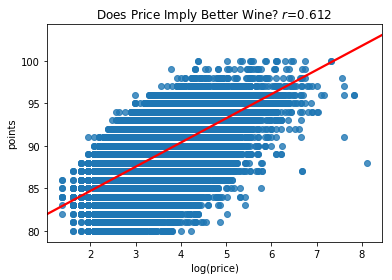

In [3]:
# correlation between points and price
slope, intercept, r_value, p_value, std_err = linregress(x=np.log(winereviews['price'].loc[pd.notna(winereviews['price'])]),y=winereviews['points'].loc[pd.notna(winereviews['price'])])

sns.regplot(x=np.log(winereviews['price'].loc[pd.notna(winereviews['price'])]),y=winereviews['points'].loc[pd.notna(winereviews['price'])],line_kws={"color":"r"})
plt.xlabel('log(price)')
plt.title(f'Does Price Imply Better Wine? $r$={round(r_value,3)}')

A common idea is that the more expensive the bottle of wine is the better the wine itself is. Here I explore and can confirm this trend. There is a clear correlation between the log of the price of wine and the points the reviewer gives. However, if we square the r-value (otherwise known as pearson's correlation coefficient) the $r^2$ is much lower. This is supported qualitatively by the model. Even though there is a positive trend, the data is not fit well by the line.

I plot two quantitative variables here: the natural log of the price and the points variable. When plotting two quantitative variables the best encoding is to use a scatterplot, as we can effectively display the relationship between two quantitative variables that way. The mark used to show (log(price),points) is a point. The channel we use is position for the points as we want to compare how the changes in price affect the points. I also plot a regression line to show the trend of the data. I use the color red to encode the line in order to avoid occlusion. The mark we use here is a line and the channel we encode is also position as we want to see how the trend line behaves as one moves up or down the x-axis.

Text(0.5,1,'Where are the best wines located?')

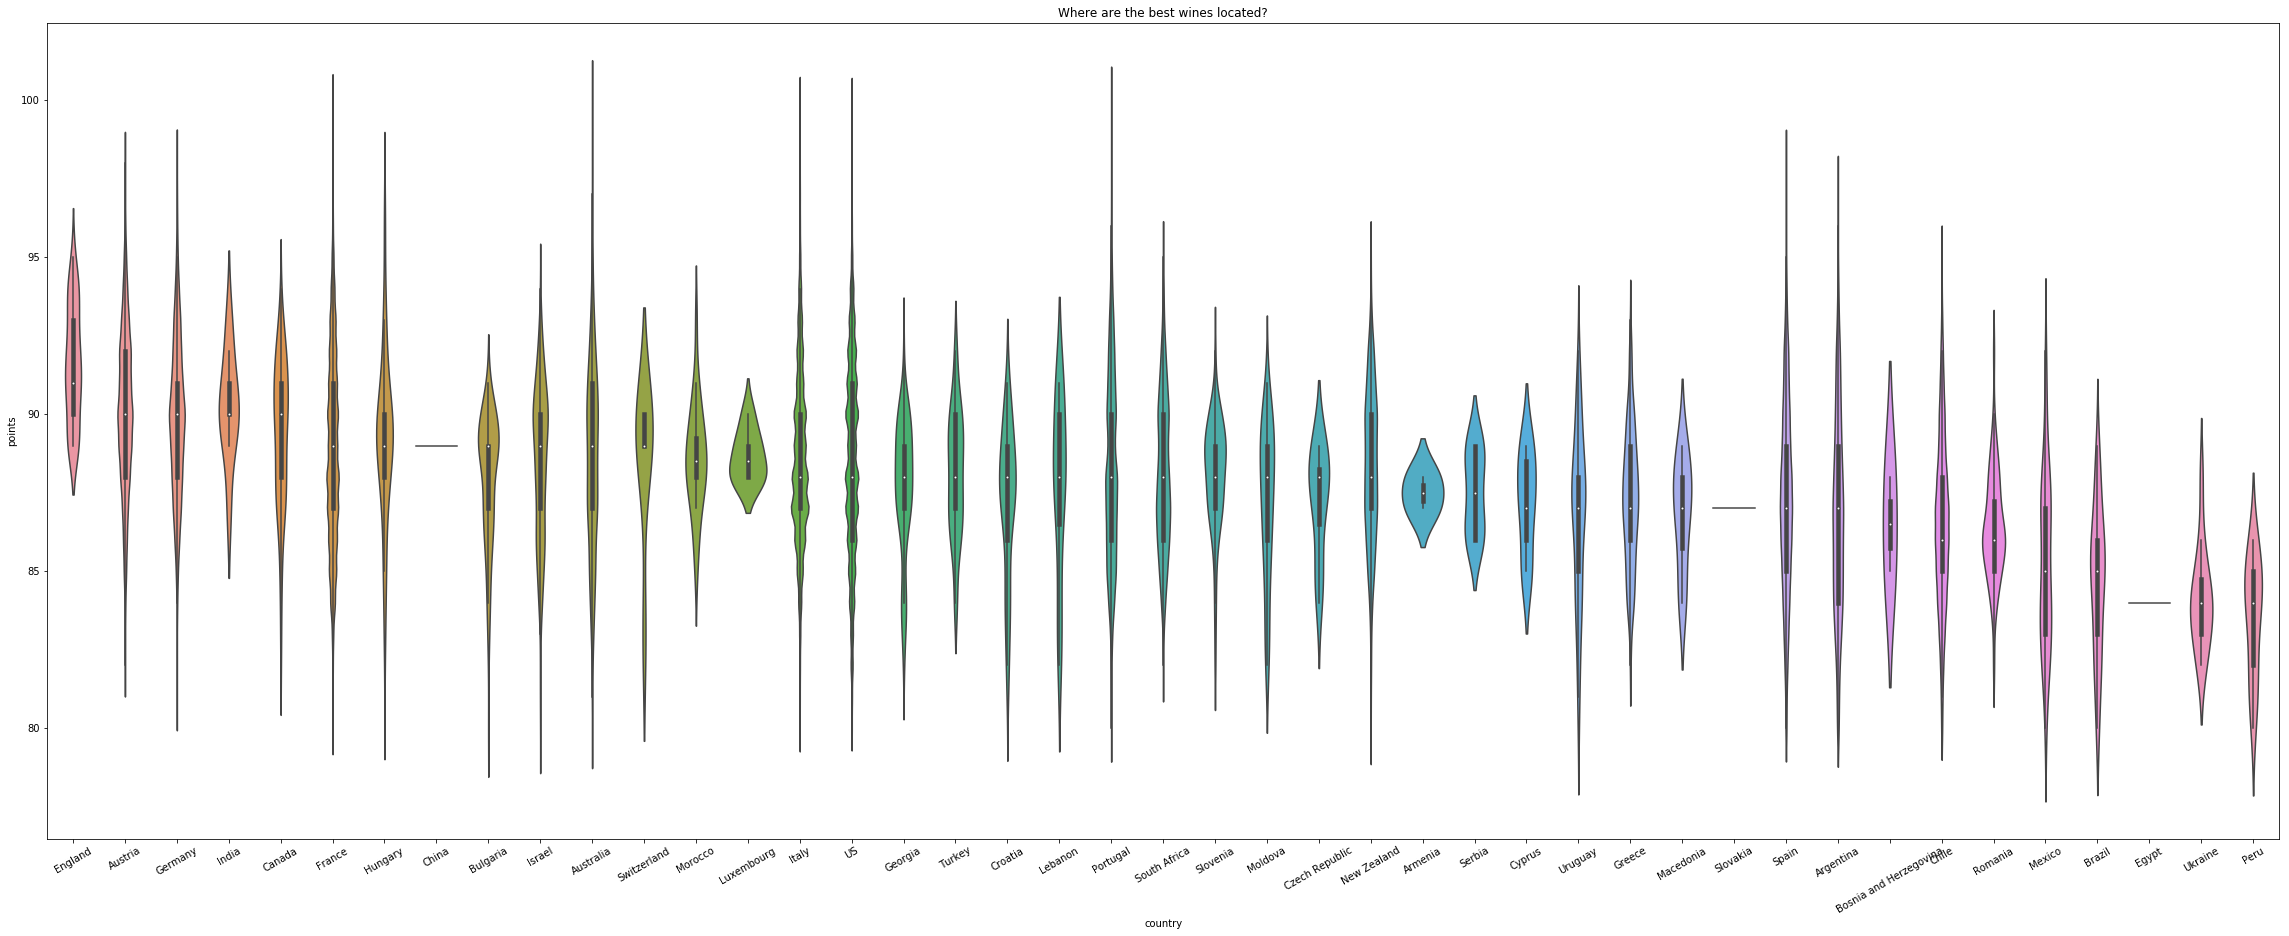

In [4]:
# violin plot of country and points
plt.figure(figsize=(40,15))
decOrder = winereviews.groupby(by=["country"])["points"].median().sort_values(ascending=False).index
vplot = sns.violinplot(data=winereviews,x='country',y='points',order=decOrder)
vplot.set_xticklabels(labels = vplot.get_xticklabels(), rotation=30)
plt.title('Where are the best wines located?')

When people think of wine they think of France. Here I explore the distribution of wines across various countries using a violin plot. These plots are ordered by the median. Surprisingly, France is not the top based on its median, but we can see that the distribution range is very long. England is the country with the highest median. We do see a gradual decrease in the medians of wine price. However, the distributions have various ranges.

Here we encode violinplots to compare distributions. As we've learned, using boxplots for multiple distribution comparisons can be misleading. I encode color here as a redundant way to identify the countries. The mark we use is an area for the violinplots as we are not only concerned with the length of the distribution, but also where in the distribution a majority of the reviews are located. I also use a point mark for the median to identify the median. The channel I encode for the violin plot is primarily position. The same is for the points.

### Dataset preprocessing

In [5]:
winereviews['bottle_date'] = winereviews['title'].str.extract(r'\D([1-2][0-9][0-9][0-9])\D')
winereviews.drop('title',axis=1,inplace=True)

C:\Users\ibiyt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(winereviews.drop('points',axis=1),winereviews['points'],test_size=0.2)

In [7]:
# get the mean of quantitative variables by the mean of wine from each country
meanPrice = X_train.groupby('country').mean().reset_index().rename(columns={'price':'mean price'})

# do on train data
X_train = X_train.merge(meanPrice,how='left',on='country')
X_train['price'] = np.where(pd.isna(X_train['price']),X_train['mean price'],X_train['price'])
X_train.drop('mean price',axis=1,inplace=True)
X_train['price'] = np.log(X_train['price'])

# do on test data
X_test = X_test.merge(meanPrice,how='left',on='country')
X_test['price'] = np.where(pd.isna(X_test['price']),X_test['mean price'],X_test['price'])
X_test.drop('mean price',axis=1,inplace=True)
X_test['price'] = np.log(X_test['price'])

In [8]:
# compare the pearson correlation coefficient for both log transform of price and no log transform

slopeLog, interceptLog, r_valueLog, p_valueLog, std_errLog = linregress(x=np.log(winereviews['price'].loc[pd.notna(winereviews['price'])]),y=winereviews['points'].loc[pd.notna(winereviews['price'])])
slope, intercept, r_value, p_value, std_err = linregress(x=winereviews['price'].loc[pd.notna(winereviews['price'])],y=winereviews['points'].loc[pd.notna(winereviews['price'])])

print((r_valueLog, p_valueLog),(r_value,p_value))

(0.61184950198314036, 0.0) (0.41616674186062252, 0.0)


In [9]:
# remove taster information 
X_train.drop(['taster_name','taster_twitter_handle'],axis=1,inplace=True)
X_test.drop(['taster_name','taster_twitter_handle'],axis=1,inplace=True)
X_train

,country,description,designation,price,province,region_1,region_2,variety,winery,bottle_date
0,France,"Tight and mineral, this crisp wine also is rip...",Les Vieux Murs,3.401197,Burgundy,Pouilly-Fuissé,NaN,Chardonnay,Loron et Fils,2014
1,US,A deep color and an aroma of extreme freshness...,Mariah Vineyard,3.737670,California,Mendocino Ridge,NaN,Pinot Noir,Waits-Mast,2012
2,Austria,Ripe and aromatic yellow pears on the nose com...,NaN,2.484907,Burgenland,NaN,NaN,Grüner Veltliner,Zantho,2013
3,France,"Like most Lanson wines, this nonvintage cuvée ...",Black Label Brut,3.806662,Champagne,Champagne,NaN,Champagne Blend,Lanson,NaN
4,US,"Delightfully piercing and pungent, the brambly...",Corral Creek Vyds,3.663562,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Chehalem,1998
5,Austria,Subtle but unmistakable white pepper flashes t...,Spiegel,3.496508,Wagram,NaN,NaN,Grüner Veltliner,Anton Bauer,2013
6,US,"Very crisp, very lean, and very lively, this w...",Brut,2.995732,California,California,California Other,Sparkling Blend,Champy,NaN
7,Italy,"Made entirely from Sangiovese, this displays a...",Riserva,3.555348,Tuscany,Chianti Classico,NaN,Sangiovese,Villa Calcinaia,2010
8,Italy,This is the kind of Brunello you want on a col...,NaN,3.682918,Tuscany,Brunello di Montalcino,NaN,Sangiovese Grosso,Donna Olga,2008
9,US,Shows lots of acidity and also the firm tannin...,Weir Vineyard,4.025352,California,Yorkville Highlands,North Coast,Pinot Noir,Williams Selyem,2007


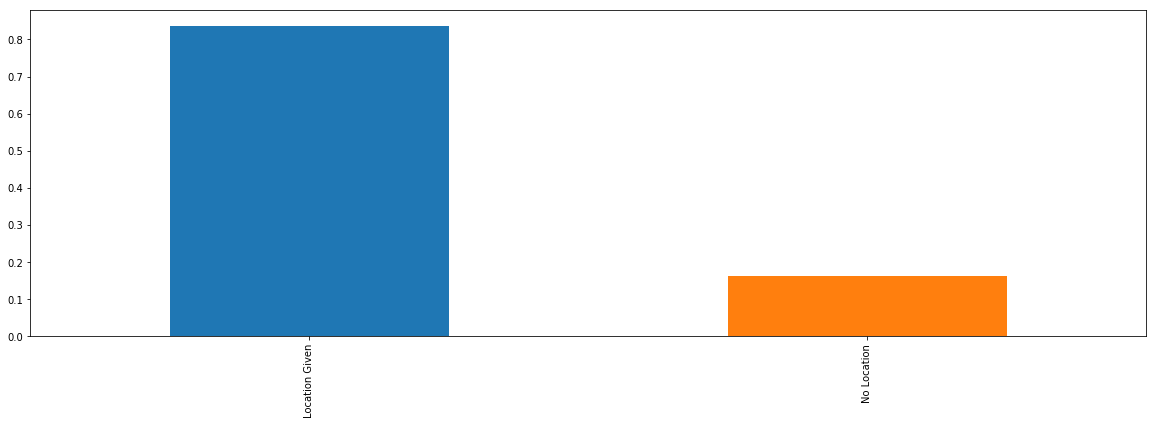

In [10]:
plt.figure(figsize=(20,6))
notnaCount = X_train['region_1'].copy(deep=True)
notnaCount = pd.Series(data=np.where(pd.notna(notnaCount),'Location Given','No Location')).value_counts(normalize=True)
notnaCount.plot(kind='bar')

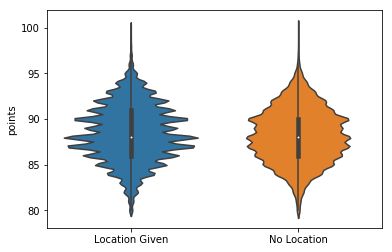

In [11]:
sns.violinplot(x=np.where(pd.notna(X_train['region_1']),'Location Given','No Location'),y=y_train)

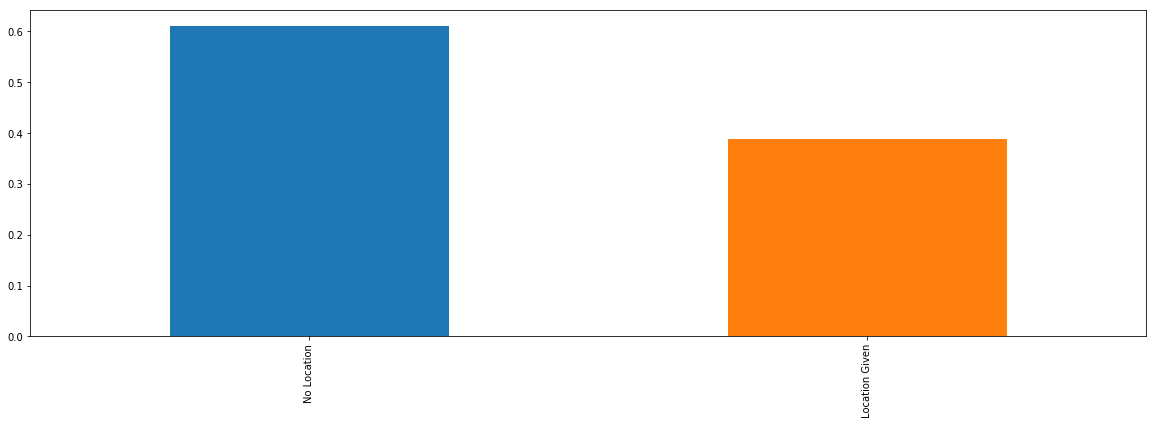

In [12]:
plt.figure(figsize=(20,6))
notnaCount2 = X_train['region_2'].copy(deep=True)
notnaCount2 = pd.Series(data=np.where(pd.notna(notnaCount2),'Location Given','No Location')).value_counts(normalize=True)
notnaCount2.plot(kind='bar')

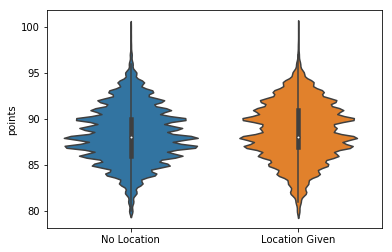

In [13]:
sns.violinplot(x=np.where(pd.notna(X_train['region_2']),'Location Given','No Location'),y=y_train)

These charts show the number of null values for these two columns, region_1 and region_2. What we see is that for region 1, a large majority of the records are not nan. However, in region 2 we see that a majority (60%) of the records are null values. 

I also look at the individual differences in the distributions of no location vs a specified location for each region variable. We see little difference betwee both groups. 

In [14]:
# extract descriptions to be set aside.

trainDesc = X_train['description'].copy(deep=True)
testDesc = X_test['description'].copy(deep=True)

X_train.drop('description',axis=1,inplace=True)
X_test.drop('description',axis=1,inplace=True)

In [15]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### Text Processing

Reviews will provide a lot of insight regarding how good a wine is. We need to preprocess the data by following these steps. 

1. Tokenize the data.
2. Remove stop words
2. Create tf-idf matrix where the documents are each description 

In [16]:
def textPreprocessing(data):
    dataCopy= data.copy(deep=True)
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    dataCopy = dataCopy.str.lower()
    translator = str.maketrans('', '', string.punctuation)

    dataCopy = dataCopy.apply(lambda x: x.translate(translator))
    dataCopy = dataCopy.apply(lambda x: pattern.sub('',x))
    #dataCopy = dataCopy.apply(lambda x: word_tokenize(x))
    return dataCopy.values

trainPreprocessed = textPreprocessing(trainDesc)
testPreprocessed = textPreprocessing(testDesc)

In [17]:
tfidf = TfidfVectorizer()
tfidf.fit(trainPreprocessed)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [18]:
train_tfidf = tfidf.transform(trainPreprocessed)
test_tfidf = tfidf.transform(testPreprocessed)

## Combining the datasets

In [22]:
X_train_sparse = X_train.to_sparse()

In [ ]:
X_test_sparse = X_test.to_sparse()